# Introduction: A Long-only Strategy based on Price & Volume Data

## Getting the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
plt.style.use("seaborn-v0_8")

In [2]:
data = pd.read_csv("bitcoin.csv", parse_dates = ["Date"], index_col = "Date")
data

,Close,Volume
Date,,
2017-08-17 04:00:00,4308.83,47.181009
2017-08-17 05:00:00,4315.32,23.234916
2017-08-17 06:00:00,4324.35,7.229691
2017-08-17 07:00:00,4349.99,4.443249
2017-08-17 08:00:00,4360.69,0.972807
...,...,...
2021-10-07 05:00:00,54735.76,2251.122020
2021-10-07 06:00:00,54534.16,1783.004260
2021-10-07 07:00:00,54755.92,4163.431360


In [3]:
data.iloc[data.index <= dt.datetime(2019, 11, 15)]

,Close,Volume
Date,,
2017-08-17 04:00:00,4308.83,47.181009
2017-08-17 05:00:00,4315.32,23.234916
2017-08-17 06:00:00,4324.35,7.229691
2017-08-17 07:00:00,4349.99,4.443249
2017-08-17 08:00:00,4360.69,0.972807
...,...,...
2019-11-14 20:00:00,8666.45,842.985315
2019-11-14 21:00:00,8667.90,571.199597
2019-11-14 22:00:00,8663.99,486.238127


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36168 entries, 2017-08-17 04:00:00 to 2021-10-07 09:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   36168 non-null  float64
 1   Volume  36168 non-null  float64
dtypes: float64(2)
memory usage: 847.7 KB


In [5]:
data = data[["Close", "Volume"]].copy()

In [6]:
data

,Close,Volume
Date,,
2017-08-17 04:00:00,4308.83,47.181009
2017-08-17 05:00:00,4315.32,23.234916
2017-08-17 06:00:00,4324.35,7.229691
2017-08-17 07:00:00,4349.99,4.443249
2017-08-17 08:00:00,4360.69,0.972807
...,...,...
2021-10-07 05:00:00,54735.76,2251.122020
2021-10-07 06:00:00,54534.16,1783.004260
2021-10-07 07:00:00,54755.92,4163.431360


## Financial Data Analysis / Visual Inspection

In [7]:
data

,Close,Volume
Date,,
2017-08-17 04:00:00,4308.83,47.181009
2017-08-17 05:00:00,4315.32,23.234916
2017-08-17 06:00:00,4324.35,7.229691
2017-08-17 07:00:00,4349.99,4.443249
2017-08-17 08:00:00,4360.69,0.972807
...,...,...
2021-10-07 05:00:00,54735.76,2251.122020
2021-10-07 06:00:00,54534.16,1783.004260
2021-10-07 07:00:00,54755.92,4163.431360


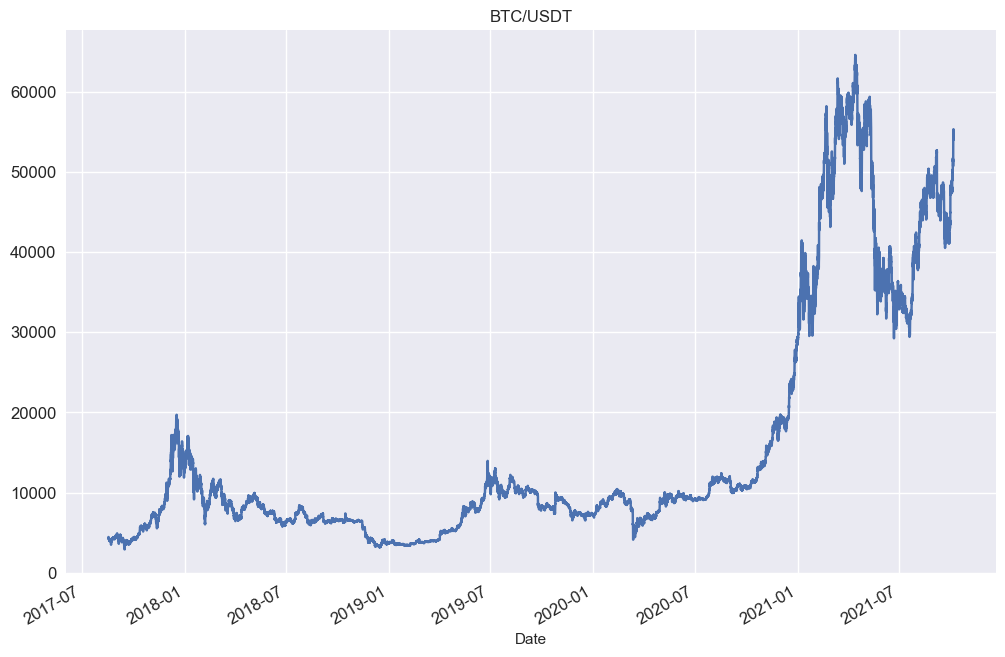

In [8]:
data.Close.plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

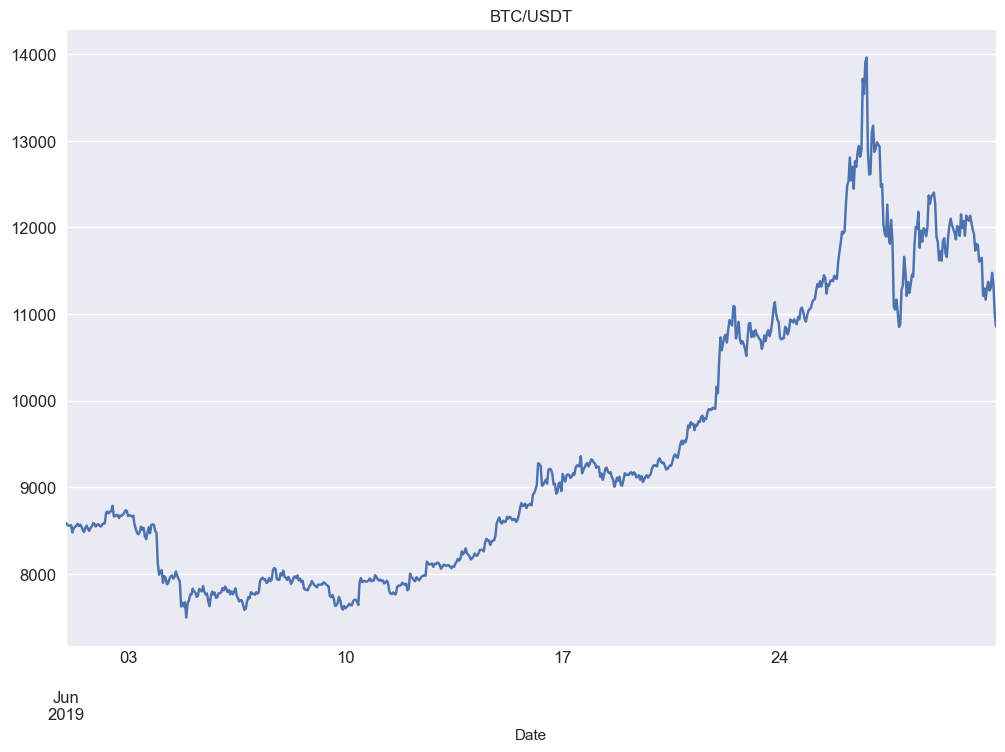

In [9]:
data.Close.loc["2019-06"].plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

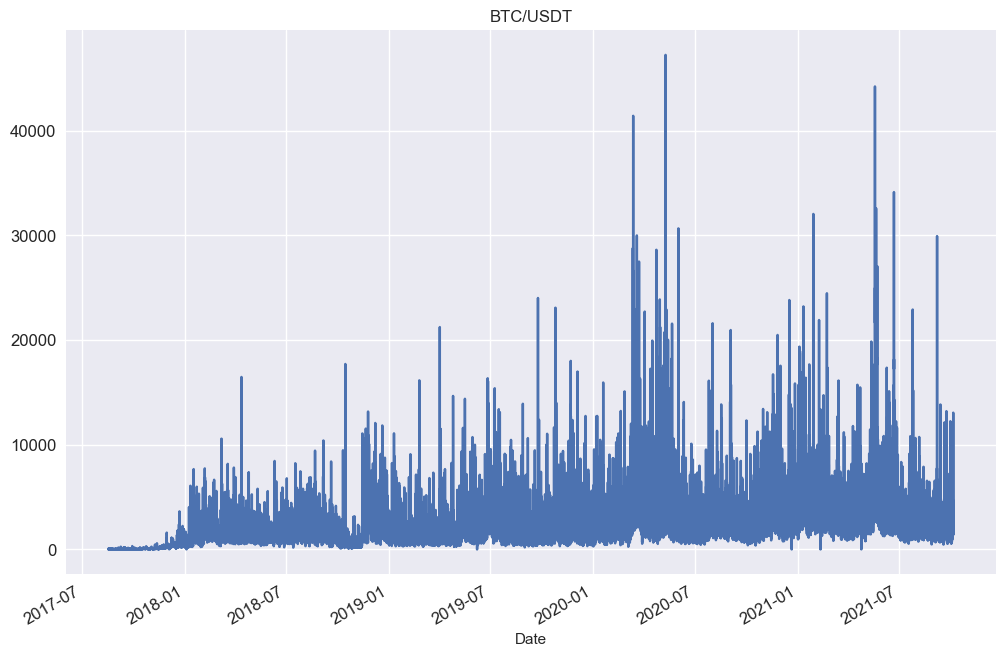

In [10]:
data.Volume.plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

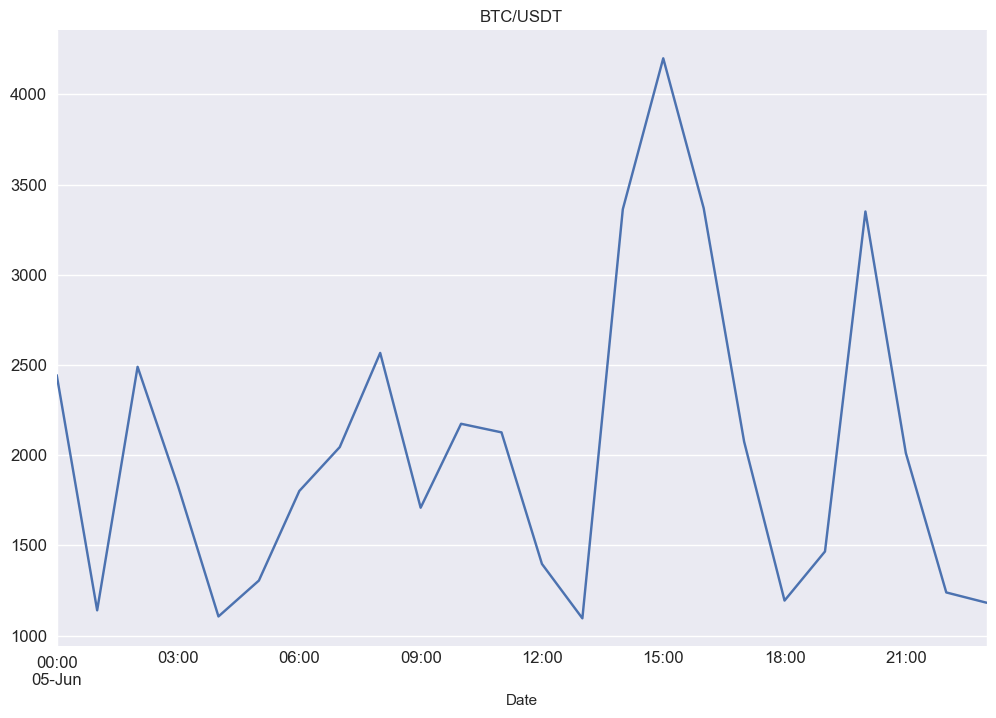

In [11]:
data.Volume.loc["2019-06-05"].plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

In [12]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))

In [13]:
data.describe()

,Close,Volume,returns
count,36168.000000,36168.000000,36167.000000
mean,15211.287479,2121.344201,0.000070
std,14918.059912,2211.660869,0.009669
min,2919.000000,0.000000,-0.201033
25%,6619.987500,910.157520,-0.002955
50%,9110.620000,1551.676864,0.000139
75%,13411.242500,2603.584828,0.003258
max,64577.260000,47255.762685,0.160280


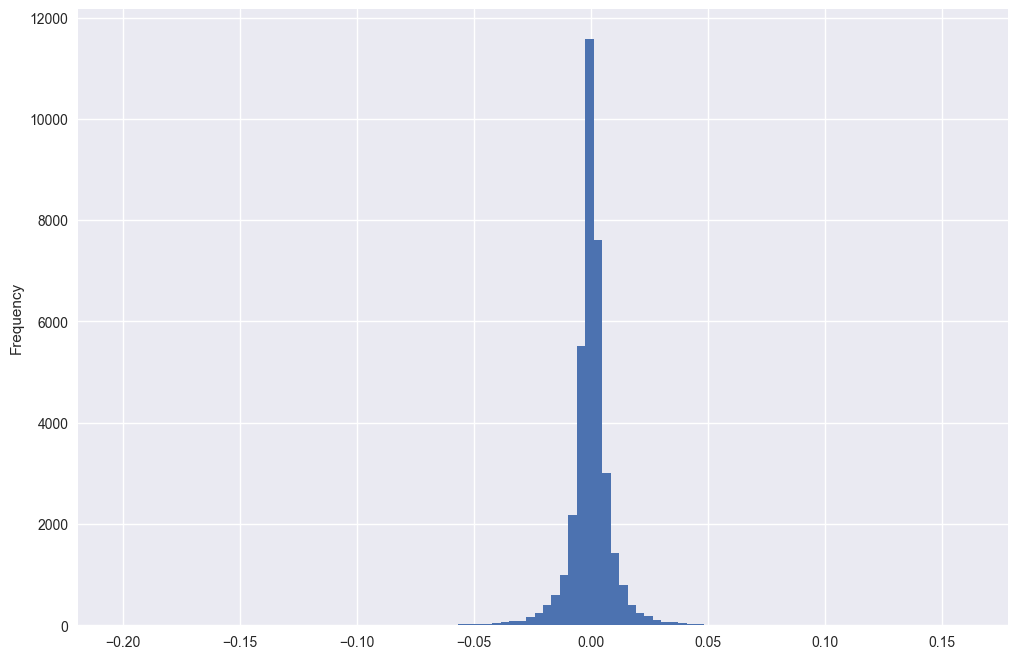

In [14]:
data.returns.plot(kind = "hist", bins = 100, figsize = (12,8))
plt.show()

In [15]:
data.returns.nlargest(10)

Date
2020-03-13 02:00:00    0.160280
2017-09-15 12:00:00    0.131731
2020-03-15 21:00:00    0.129546
2017-09-15 14:00:00    0.117777
2021-01-29 08:00:00    0.116145
2017-09-05 02:00:00    0.113257
2018-01-17 16:00:00    0.108790
2018-04-12 11:00:00    0.103325
2018-10-15 06:00:00    0.100727
2019-07-18 14:00:00    0.089576
Name: returns, dtype: float64

In [16]:
data.returns.nsmallest(10)

Date
2020-03-12 10:00:00   -0.201033
2020-03-12 23:00:00   -0.189707
2020-03-13 01:00:00   -0.119449
2017-12-28 02:00:00   -0.108097
2017-12-22 13:00:00   -0.107858
2017-09-05 01:00:00   -0.099818
2017-08-22 04:00:00   -0.098295
2020-03-15 22:00:00   -0.095180
2021-05-19 12:00:00   -0.093810
2019-09-24 18:00:00   -0.093730
Name: returns, dtype: float64

## A simple Buy and Hold "Strategy"

Assumption: Invest 1 USD(T) in BTC on 2017-08-17 and hold until 2021-10-07 (no further trades).

In [17]:
data

,Close,Volume,returns
Date,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505
2017-08-17 06:00:00,4324.35,7.229691,0.002090
2017-08-17 07:00:00,4349.99,4.443249,0.005912
2017-08-17 08:00:00,4360.69,0.972807,0.002457
...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690
2021-10-07 07:00:00,54755.92,4163.431360,0.004058


In [18]:
data.Close / data.Close[0]

C:\Users\HALİLCAN HASMER\AppData\Local\Temp\ipykernel_1440\3104999750.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.Close / data.Close[0]


Date
2017-08-17 04:00:00     1.000000
2017-08-17 05:00:00     1.001506
2017-08-17 06:00:00     1.003602
2017-08-17 07:00:00     1.009552
2017-08-17 08:00:00     1.012036
                         ...    
2021-10-07 05:00:00    12.703161
2021-10-07 06:00:00    12.656373
2021-10-07 07:00:00    12.707839
2021-10-07 08:00:00    12.657334
2021-10-07 09:00:00    12.531360
Name: Close, Length: 36168, dtype: float64

In [19]:
data.returns.sum()

2.528234304212195

In [20]:
multiple = np.exp(data.returns.sum())
multiple

12.531360021165671

In [21]:
data["creturns"] = data.returns.cumsum().apply(np.exp) # Normalized Prices with Base Value 1

In [22]:
data

,Close,Volume,returns,creturns
Date,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036
...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839


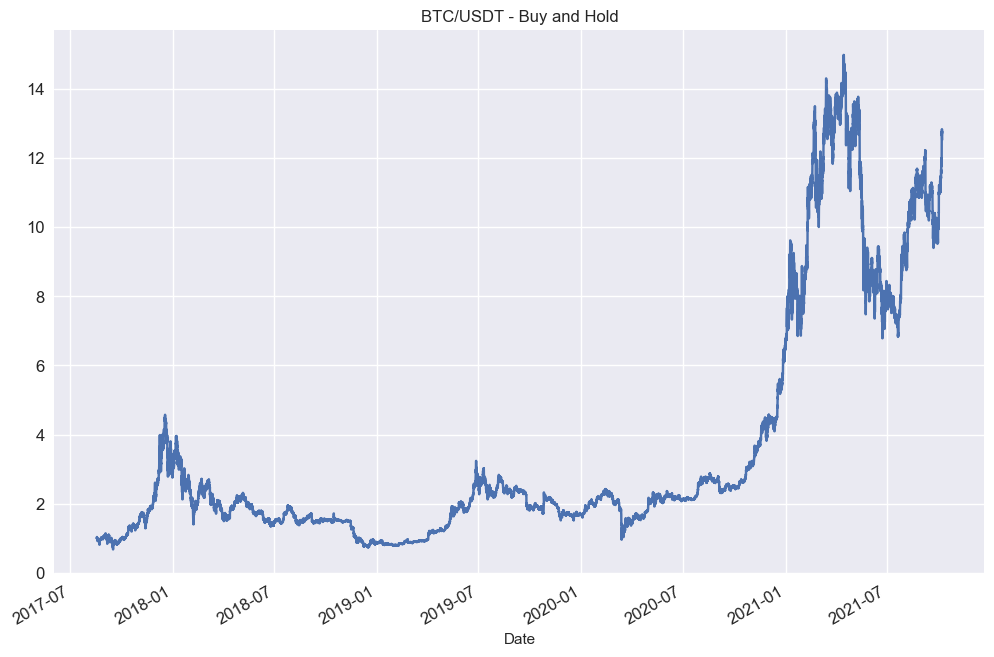

In [23]:
data.creturns.plot(figsize = (12, 8), title = "BTC/USDT - Buy and Hold", fontsize = 12)
plt.show()

## Performance Measurement

In [24]:
data

,Close,Volume,returns,creturns
Date,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036
...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839


__mean return and risk__

In [25]:
mu = data.returns.mean()
mu

6.990445168834005e-05

In [26]:
std = data.returns.std()
std

0.009669001511177772

__annualized mean return and risk__

In [27]:
number_of_periods = 24 * 365.25
number_of_periods

8766.0

In [28]:
ann_mean = mu * number_of_periods
ann_mean

0.6127824234999889

In [29]:
ann_std = std * np.sqrt(number_of_periods)
ann_std

0.9052788232893794

__CAGR__

In [30]:
cagr = np.exp(ann_mean) - 1
cagr

0.845559389167847

__Risk-adjusted Return__ ("Sharpe Ratio")

In [31]:
ann_mean / ann_std

0.6768991030557977

In [32]:
cagr / ann_std

0.9340319992192697

## Preparing the Data for the Trading Strategy

In [33]:
data

,Close,Volume,returns,creturns
Date,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036
...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839


__Adding the Feature "Change in Trading Volume (log)"__

In [34]:
data["vol_ch"] = np.log(data.Volume.div(data.Volume.shift(1)))
data

C:\Users\HALİLCAN HASMER\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Close,Volume,returns,creturns,vol_ch
Date,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955
...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040


__Data Cleaning (removing outliers)__

In [35]:
data.vol_ch.nsmallest(20)

Date
2019-06-07 21:00:00        -inf
2020-12-21 14:00:00        -inf
2021-02-11 03:00:00        -inf
2021-04-25 04:00:00   -5.644090
2018-01-04 03:00:00   -5.428025
2019-06-07 20:00:00   -4.780619
2017-08-19 23:00:00   -3.801014
2017-08-20 09:00:00   -3.782857
2017-08-26 04:00:00   -3.470297
2017-12-04 06:00:00   -3.178488
2017-09-24 21:00:00   -2.749294
2017-08-21 09:00:00   -2.643555
2017-08-19 19:00:00   -2.357538
2020-06-09 01:00:00   -2.157645
2017-08-20 03:00:00   -2.106886
2018-10-06 03:00:00   -2.072737
2017-09-12 20:00:00   -1.948525
2019-10-13 21:00:00   -1.905406
2017-10-07 04:00:00   -1.901772
2020-03-04 09:00:00   -1.841755
Name: vol_ch, dtype: float64

In [36]:
data.vol_ch.nlargest(20)

Date
2019-06-07 22:00:00         inf
2020-12-21 18:00:00         inf
2021-02-11 05:00:00         inf
2018-01-04 05:00:00    5.256246
2021-04-25 08:00:00    5.051831
2017-08-20 00:00:00    3.794985
2017-08-26 05:00:00    3.428566
2017-08-20 11:00:00    2.904046
2017-10-12 00:00:00    2.884007
2017-12-04 07:00:00    2.851238
2019-07-27 10:00:00    2.808519
2017-08-20 15:00:00    2.779948
2019-12-16 18:00:00    2.658757
2017-08-20 05:00:00    2.585916
2019-09-06 17:00:00    2.579215
2018-04-12 11:00:00    2.562466
2020-06-10 18:00:00    2.537417
2018-10-15 05:00:00    2.525149
2019-01-19 10:00:00    2.512394
2019-07-28 22:00:00    2.490934
Name: vol_ch, dtype: float64

In [37]:
data.loc[data.vol_ch > 3, "vol_ch"] = np.nan
data.loc[data.vol_ch < -3, "vol_ch"] = np.nan

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36168 entries, 2017-08-17 04:00:00 to 2021-10-07 09:00:00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     36168 non-null  float64
 1   Volume    36168 non-null  float64
 2   returns   36167 non-null  float64
 3   creturns  36167 non-null  float64
 4   vol_ch    36150 non-null  float64
dtypes: float64(5)
memory usage: 2.7 MB


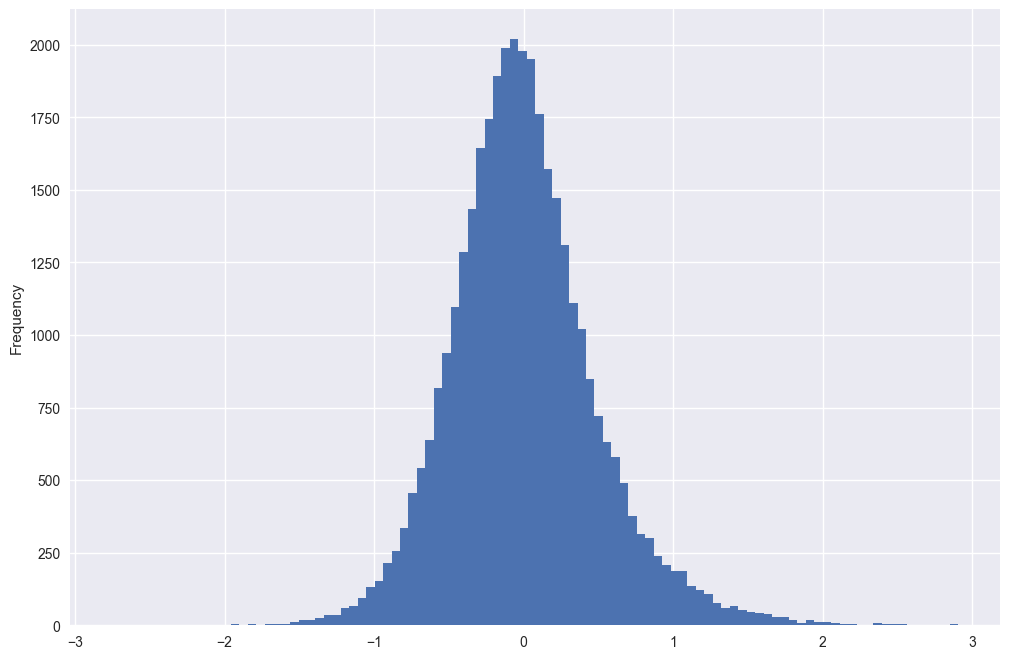

In [39]:
data.vol_ch.plot(kind = "hist", bins = 100, figsize = (12,8))
plt.show()

In [40]:
data

,Close,Volume,returns,creturns,vol_ch
Date,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955
...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040


## Explanatory Data Analysis: Financial Returns and Trading Volume (1)

__Question 1: Is there a relationship between price changes and volume changes?__ <br>
(e.g. rapid Increase in Trading Volume triggers extreme Price changes) 

In [41]:
data

,Close,Volume,returns,creturns,vol_ch
Date,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955
...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040


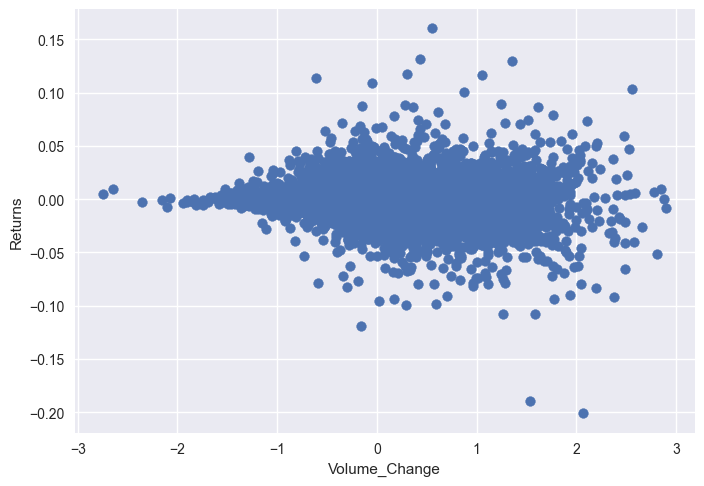

In [42]:
plt.scatter(x = data.vol_ch, y = data.returns)
plt.xlabel("Volume_Change")
plt.ylabel("Returns")
plt.show()

Discretize columns returns and vol_ch: Sort and reorganize each in 10 equal sized buckets

In [43]:
pd.qcut(data.returns, q = 10)

Date
2017-08-17 04:00:00                   NaN
2017-08-17 05:00:00    (0.00119, 0.00245]
2017-08-17 06:00:00    (0.00119, 0.00245]
2017-08-17 07:00:00    (0.00437, 0.00823]
2017-08-17 08:00:00    (0.00245, 0.00437]
                              ...        
2021-10-07 05:00:00    (-0.00781, -0.004]
2021-10-07 06:00:00    (-0.004, -0.00216]
2021-10-07 07:00:00    (0.00245, 0.00437]
2021-10-07 08:00:00    (-0.004, -0.00216]
2021-10-07 09:00:00    (-0.202, -0.00781]
Name: returns, Length: 36168, dtype: category
Categories (10, interval[float64, right]): [(-0.202, -0.00781] < (-0.00781, -0.004] < (-0.004, -0.00216] < (-0.00216, -0.000935] ... (0.00119, 0.00245] < (0.00245, 0.00437] < (0.00437, 0.00823] < (0.00823, 0.16]]

In [44]:
data["ret_cat"] = pd.qcut(data.returns, q = 10, labels = [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])

In [45]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat
Date,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3
...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3


In [46]:
data.ret_cat.value_counts()

ret_cat
-5    3617
-4    3617
-2    3617
-1    3617
2     3617
4     3617
5     3617
-3    3616
1     3616
3     3616
Name: count, dtype: int64

In [47]:
data["vol_cat"] = pd.qcut(data.vol_ch, q = 10, labels = [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])

In [48]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat
Date,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5
...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5


In [49]:
matrix = pd.crosstab(data.vol_cat, data.ret_cat)
matrix

ret_cat,-5,-4,-3,-2,-1,1,2,3,4,5
vol_cat,,,,,,,,,,
-5,142,292,378,394,446,487,474,414,370,218
-4,193,288,407,398,433,436,447,394,374,245
-3,196,301,393,448,432,455,426,386,344,234
-2,229,346,390,429,433,427,436,351,310,264
-1,227,324,419,423,426,427,395,359,338,277
1,285,391,366,422,392,399,338,382,339,301
2,319,397,364,378,355,377,338,390,362,335
3,398,388,374,323,337,306,360,371,373,385
4,569,487,300,272,253,198,256,329,454,497


In [52]:
import seaborn as sns

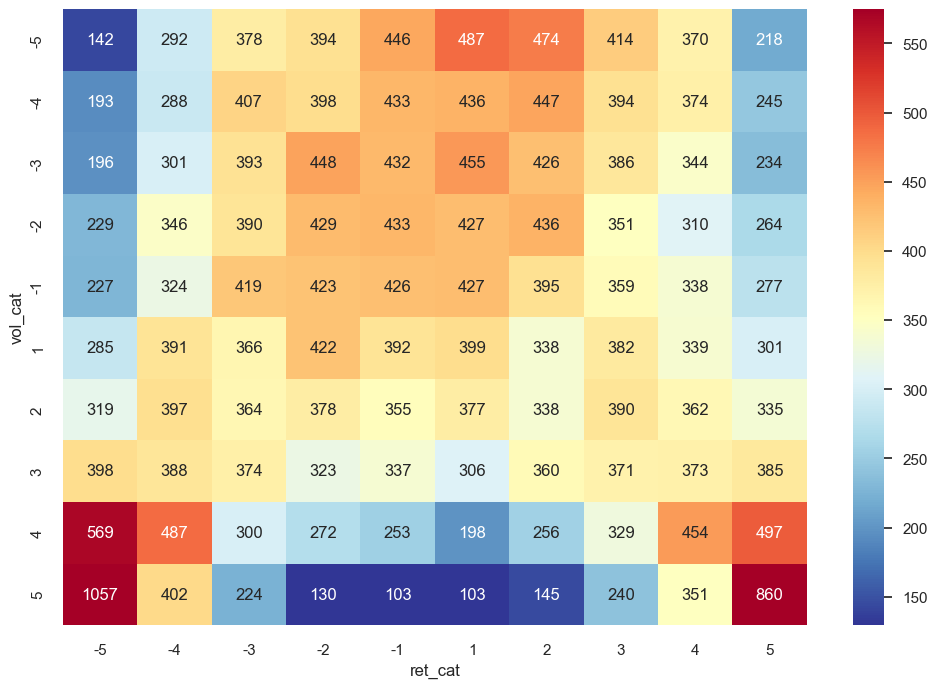

In [53]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
sns.heatmap(matrix, cmap = "RdYlBu_r", annot = True, robust = True, fmt = ".0f")
plt.show()

__-> Extreme increases in Trading Volume trigger extreme (positive and negative) returns.__ <br>
__-> Low to moderate changes in the Trading Volume occur frequently with low to moderate returns__.

## Explanatory Data Analysis: Financial Returns and Trading Volume (2)

Question 2: Can we use return/vol_ch clusters to (partly) forecast future returns? <br>
(e.g. Cluster 5/5 is a strong momentum signal -> prices will further rise in the near future) 

In [54]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat
Date,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5
...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5


In [55]:
data.vol_cat.shift()

Date
2017-08-17 04:00:00    NaN
2017-08-17 05:00:00    NaN
2017-08-17 06:00:00     -5
2017-08-17 07:00:00     -5
2017-08-17 08:00:00     -4
                      ... 
2021-10-07 05:00:00     -1
2021-10-07 06:00:00      4
2021-10-07 07:00:00     -2
2021-10-07 08:00:00      5
2021-10-07 09:00:00     -5
Name: vol_cat, Length: 36168, dtype: category
Categories (10, int64): [-5 < -4 < -3 < -2 ... 2 < 3 < 4 < 5]

In [56]:
matrix = pd.crosstab(data.vol_cat.shift(), data.ret_cat.shift(),
                     values = data.returns, aggfunc = np.mean)
matrix

C:\Users\HALİLCAN HASMER\AppData\Local\Temp\ipykernel_1440\3113069884.py:1: FutureWarning: The provided callable <function mean at 0x0000017A517C74C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  matrix = pd.crosstab(data.vol_cat.shift(), data.ret_cat.shift(),


ret_cat,-5,-4,-3,-2,-1,1,2,3,4,5
vol_cat,,,,,,,,,,
-5,0.004261,0.000484,-0.000479,0.000831,-0.000318,-0.000067,-0.000372,0.000026,-0.000246,0.000185
-4,0.002740,-0.000697,0.000015,-0.000135,-0.000025,0.000337,-0.000011,0.000257,-0.001055,-0.004235
-3,-0.000658,0.001505,0.000234,-0.000572,-0.000003,0.000179,-0.000277,-0.000092,0.000019,-0.000909
-2,0.003566,0.000328,-0.000440,0.000449,0.000092,-0.000517,-0.000812,0.000129,-0.000508,-0.000715
-1,-0.001165,0.001731,0.000713,0.000034,-0.000225,-0.000012,-0.000544,-0.000124,0.000196,-0.001321
1,0.001398,-0.000612,0.000845,-0.000018,0.000559,-0.000516,0.000030,-0.000429,-0.000024,-0.000360
2,0.000818,0.000331,-0.000028,0.000785,-0.000476,0.000207,0.000138,-0.000014,0.000073,0.000219
3,0.001445,-0.000156,0.000322,0.000101,-0.000215,0.000140,0.000302,0.000232,-0.000231,0.000589
4,0.000964,0.000152,-0.000551,0.000856,-0.000099,-0.000772,-0.000014,-0.000061,0.000023,-0.000403


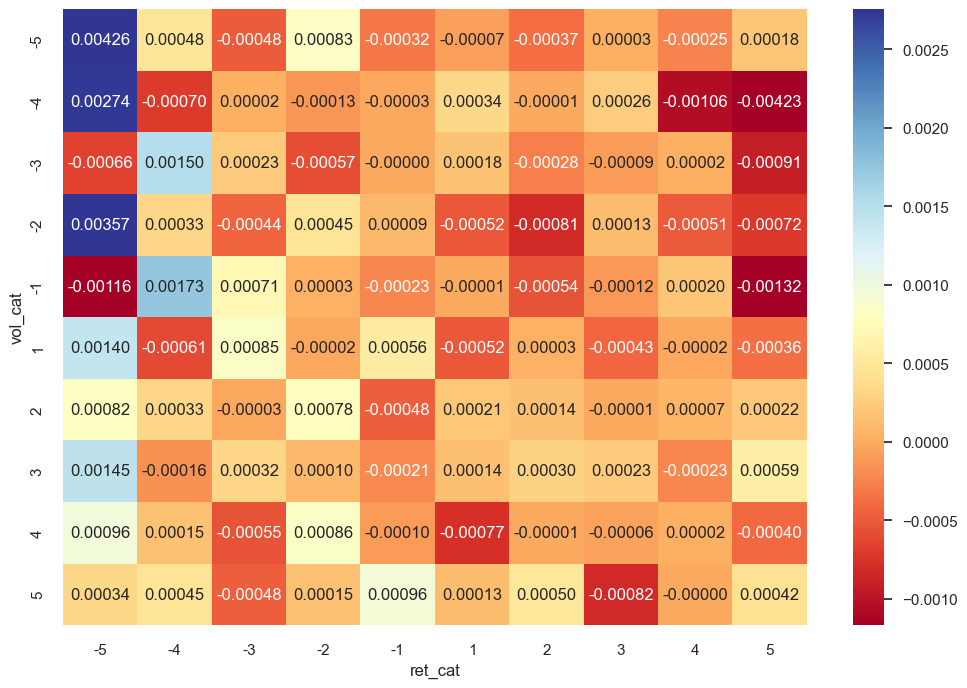

In [57]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
sns.heatmap(matrix, cmap = "RdYlBu", annot = True, robust = True, fmt = ".5f")
plt.show()

__-> Extremely High (positive) returns and Decreases in Volume is a Contrarian (mean-reverting) signal -> prices will fall.__ <br>
__-> Extremely Low (negative) returns and Decreases in Volume is a Contrarian (mean-reverting) signal -> prices will rise.__

## Formulating a Long-only Price/Volume Trading Strategy

__Plan__: Make Use of the _"Extremely High (positive) returns and Decreases in Volume"_ Cluster (falling prices):

__Implementation__: 
- Buy BTC/USDT in the Spot market and hold...
- ...until there is a signal to sell -> sell and go neutral.
- Buy back when the signal to sell has disappeared.

In [58]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat
Date,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5
...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5


In [59]:
data["position"] = 1 # Trading position -> long(1) for all bars: Buy-and-Hold
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position
Date,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1
...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1


Sell and go Neutral (position = 0) if returns are very high (cond1) and vol_ch is negative (cond2)

In [60]:
# getting returns threshold for very high returns (>= 90th percentile)
return_thresh = np.percentile(data.returns.dropna(), 90)
return_thresh

0.008231867023808183

In [61]:
cond1 = data.returns >= return_thresh
cond1

Date
2017-08-17 04:00:00    False
2017-08-17 05:00:00    False
2017-08-17 06:00:00    False
2017-08-17 07:00:00    False
2017-08-17 08:00:00    False
                       ...  
2021-10-07 05:00:00    False
2021-10-07 06:00:00    False
2021-10-07 07:00:00    False
2021-10-07 08:00:00    False
2021-10-07 09:00:00    False
Name: returns, Length: 36168, dtype: bool

In [62]:
# getting vol_ch thresholds for (moderate) Volume Decreases (between 5th and 20th percentile)
volume_thresh = np.percentile(data.vol_ch.dropna(), [5, 20])
volume_thresh

array([-0.72895253, -0.37604441])

In [63]:
cond2 = data.vol_ch.between(volume_thresh[0], volume_thresh[1])
cond2

Date
2017-08-17 04:00:00    False
2017-08-17 05:00:00     True
2017-08-17 06:00:00    False
2017-08-17 07:00:00     True
2017-08-17 08:00:00    False
                       ...  
2021-10-07 05:00:00    False
2021-10-07 06:00:00    False
2021-10-07 07:00:00    False
2021-10-07 08:00:00     True
2021-10-07 09:00:00    False
Name: vol_ch, Length: 36168, dtype: bool

In [64]:
data.loc[cond1 & cond2, "position"] = 0

In [65]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position
Date,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1
...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1


In [66]:
data.position.value_counts()

position
1    35804
0      364
Name: count, dtype: int64

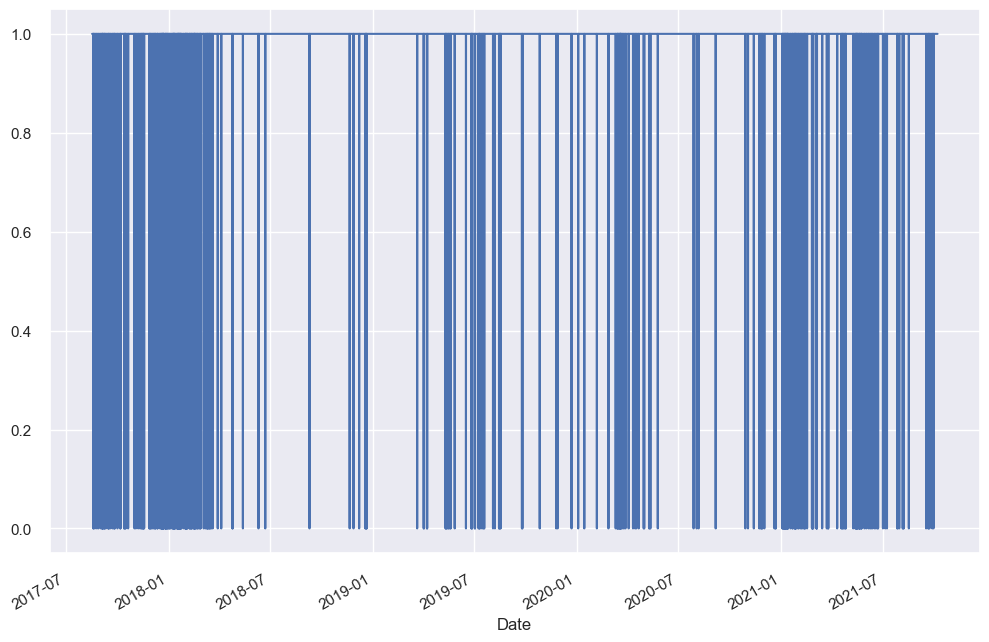

In [67]:
data.loc[:, "position"].plot(figsize = (12 , 8))
plt.show()

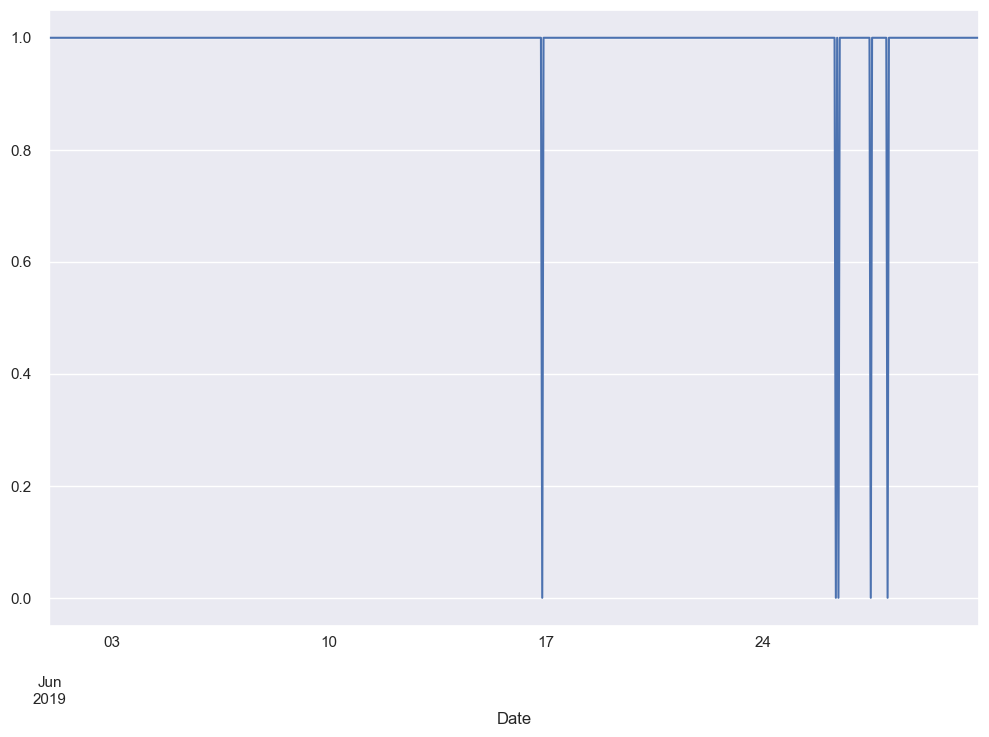

In [68]:
data.loc["2019-06", "position"].plot(figsize = (12 , 8))
plt.show()

## Strategy Backtest

In [69]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position
Date,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1
...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1


In [70]:
# position to take for the next bar - use shift(1)
data["strategy"] = data.position.shift(1) * data["returns"]
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position,strategy
Date,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1,0.001505
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1,0.002090
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1,0.005912
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1,0.002457
...,...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1,-0.006146
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1,-0.003690
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1,0.004058


In [71]:
data.loc["2017-08-19"]

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position,strategy
Date,,,,,,,,,
2017-08-19 00:00:00,4163.49,41.308877,0.013327,0.966269,-0.084180,5,-1,1,0.013327
2017-08-19 01:00:00,4148.53,28.835177,-0.003600,0.962797,-0.359481,-3,-3,1,-0.003600
2017-08-19 02:00:00,4156.39,18.754474,0.001893,0.964621,-0.430164,2,-4,1,0.001893
2017-08-19 03:00:00,4138.55,19.611920,-0.004301,0.960481,0.044705,-4,1,1,-0.004301
2017-08-19 04:00:00,4068.26,17.353232,-0.017130,0.944168,-0.122359,-5,-1,1,-0.017130
2017-08-19 05:00:00,4077.00,12.514194,0.002146,0.946197,-0.326915,2,-3,1,0.002146
2017-08-19 06:00:00,3986.87,51.455431,-0.022355,0.925279,1.413852,-5,5,1,-0.022355
2017-08-19 07:00:00,4033.47,31.429222,0.011621,0.936094,-0.492978,5,-4,0,0.011621
2017-08-19 08:00:00,3999.00,18.006405,-0.008583,0.928094,-0.557011,-5,-4,1,-0.000000


In [72]:
data[["returns", "strategy"]].sum().apply(np.exp) # multiple for buy-and-hold and strategy

returns     12.531360
strategy    35.082084
dtype: float64

In [73]:
# normalized price with base = 1 for strategy
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp) 

In [74]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position,strategy,cstrategy
Date,,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1,0.002457,1.012036
...,...,...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1,-0.006146,35.563047
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1,-0.003690,35.432063
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1,0.004058,35.576146


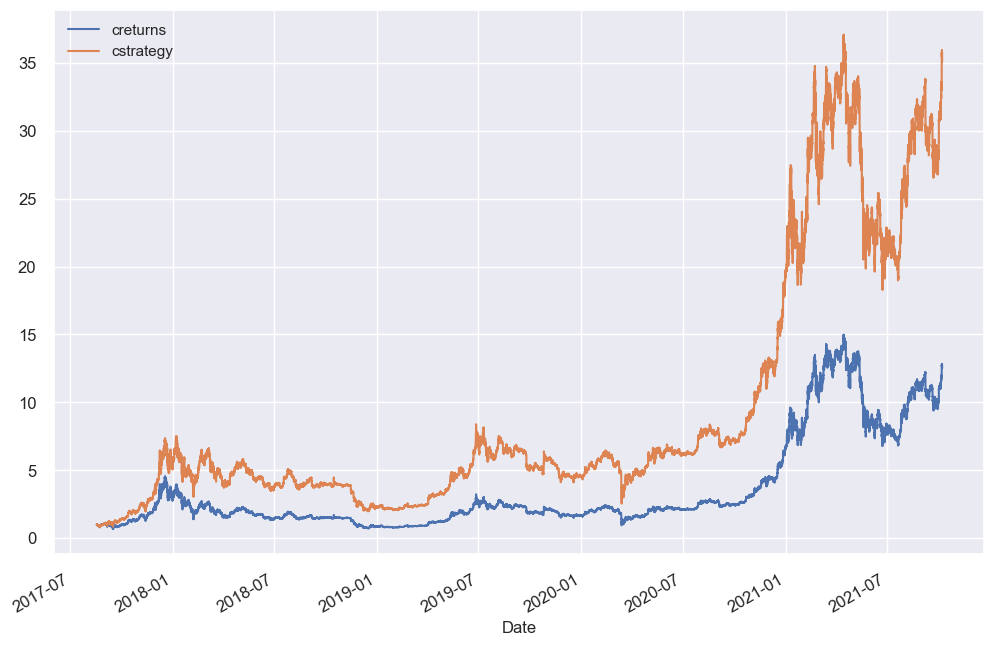

In [75]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8), fontsize = 12)
plt.show()

In [76]:
tp_year = 24 * 365.25  # 1h trading periods per year
tp_year

8766.0

In [77]:
ann_mean = data[["returns", "strategy"]].mean() * tp_year # annualized returns
ann_mean

returns     0.612782
strategy    0.862298
dtype: float64

In [78]:
ann_std = data[["returns", "strategy"]].std() * np.sqrt(tp_year) # annualized std
ann_std

returns     0.905279
strategy    0.891472
dtype: float64

In [79]:
sharpe = (np.exp(ann_mean) - 1) / ann_std
sharpe

returns     0.934032
strategy    1.535209
dtype: float64

Great, but we still ignore:
- __Trading Costs__
- __Parameter Optimization__
- __Forward Testing__ (to avoid/remove data snooping and the lookahead bias)

## Trading Costs

In [80]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position,strategy,cstrategy
Date,,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1,0.002457,1.012036
...,...,...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1,-0.006146,35.563047
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1,-0.003690,35.432063
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1,0.004058,35.576146


In [81]:
data.position.value_counts()

position
1    35804
0      364
Name: count, dtype: int64

In [82]:
data.position.diff().fillna(0).abs() # absolute change in position

Date
2017-08-17 04:00:00    0.0
2017-08-17 05:00:00    0.0
2017-08-17 06:00:00    0.0
2017-08-17 07:00:00    0.0
2017-08-17 08:00:00    0.0
                      ... 
2021-10-07 05:00:00    0.0
2021-10-07 06:00:00    0.0
2021-10-07 07:00:00    0.0
2021-10-07 08:00:00    0.0
2021-10-07 09:00:00    0.0
Name: position, Length: 36168, dtype: float64

In [83]:
data["trades"] = data.position.diff().fillna(0).abs()

In [84]:
data.trades.value_counts()

trades
0.0    35450
1.0      718
Name: count, dtype: int64

In [85]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position,strategy,cstrategy,trades
Date,,,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1,0.001505,1.001506,0.0
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1,0.002090,1.003602,0.0
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1,0.005912,1.009552,0.0
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1,0.002457,1.012036,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1,-0.006146,35.563047,0.0
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1,-0.003690,35.432063,0.0
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1,0.004058,35.576146,0.0


-> __718 single trades__ (from neutral to long or from long to neutral) <br>
-> each trade __triggers trading costs__, don´t ignore them!!! <br>
-> Trading Costs __must be included__ in Backtesting!!! <br>

In [86]:
commissions = 0.00075 # reduced Binance commission 0.075%
commissions

0.00075

In [87]:
other = 0.0001 # proportional costs for bid-ask spread & slippage (more detailed analysis required!)
other

0.0001

In [88]:
# total proportional trading costs (negative log return)
ptc = np.log(1 - commissions) + np.log(1 - other)
ptc

-0.0008502863910375247

In [89]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position,strategy,cstrategy,trades
Date,,,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1,0.001505,1.001506,0.0
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1,0.002090,1.003602,0.0
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1,0.005912,1.009552,0.0
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1,0.002457,1.012036,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1,-0.006146,35.563047,0.0
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1,-0.003690,35.432063,0.0
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1,0.004058,35.576146,0.0


In [90]:
data["strategy_net"] = data.strategy + data.trades * ptc # strategy returns net of costs

In [91]:
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [92]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position,strategy,cstrategy,trades,strategy_net,cstrategy_net
Date,,,,,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1,0.001505,1.001506,0.0,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1,0.002090,1.003602,0.0,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1,0.005912,1.009552,0.0,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1,0.002457,1.012036,0.0,0.002457,1.012036
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1,-0.006146,35.563047,0.0,-0.006146,19.313445
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1,-0.003690,35.432063,0.0,-0.003690,19.242310
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1,0.004058,35.576146,0.0,0.004058,19.320558


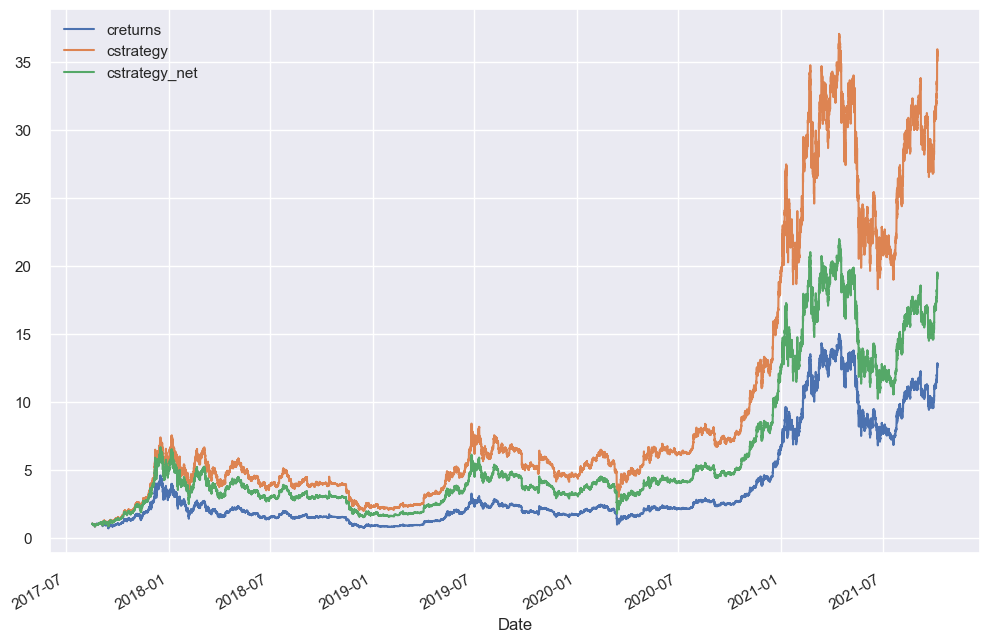

In [93]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

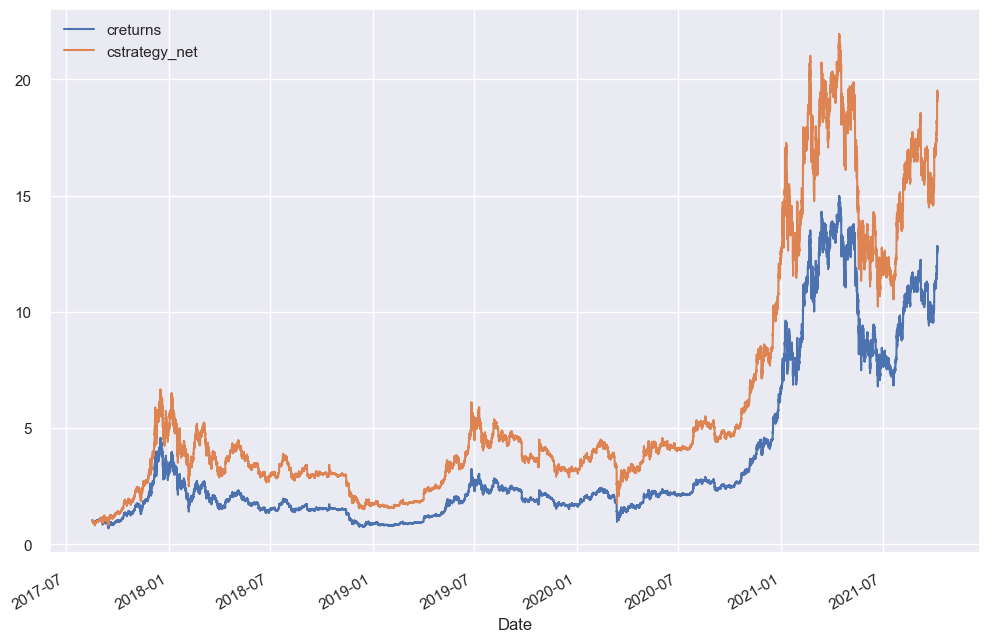

In [94]:
data[["creturns", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()